# Age Estimation 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/School/581 Projects/Project 8.2'

/content/drive/MyDrive/School/581 Projects/Project 8.2


In [3]:
import numpy as np
import os
from math import * 
from helperP import *

# Loading Data

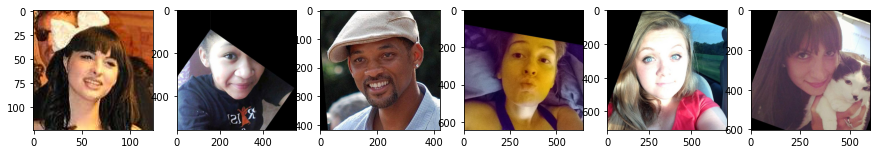

In [4]:
base_dir = 'DATASET/'

age_train, features_train = prepare_data('train', base_dir)


age_val, features_val = prepare_data('val', base_dir)


_, features_test = prepare_data('test', base_dir)
show_data(base_dir)


## Linear class
	LINEAR
	Implementation of the linear layer (also called fully connected layer)
	which performs linear transoformation on input data y = xW + b.
	This layer has two learnable parameters, weight of shape (input_channel, output_channel)
	and bias of shape (output_channel), which are specified and initalized in init_param()
	function. In this assignment, you need to implement both forward and backward computation
	Arguments:
		input_channel  -- integer, number of input channels
		output_channel -- integer, number of output channels

In [7]:
class Linear(object):
	

	def __init__(self, input_channel, output_channel):

		self.input_channel = input_channel
		self.output_channel = output_channel
		self.init_param()

	def init_param(self):

		###############################################
		# TODO: YOUR CODE HERE: init weights
		
		self.weight = np.random.randn(self.input_channel, self.output_channel) * 0.01
		self.bias = np.zeros((self.output_channel))
		##################################################
		#self.weight = None
		#self.bias = None

	'''
		Forward computation of linear layer, you may want to save some intermediate
		variable to class membership (self.) for reusing in backward computation.
		Arguments:
			input -- numpy array of shape (N, input_channel) # (3995, 2048) = X

		Output
			output -- numpy array of shape (N, output_channel) # (3995, 101) = 
	'''
  	def forward(self, inputX):
		self.inputX = inputX
	
		##################################################
		# TODO: YOUR CODE HERE: forward
		
		self.oldInput = inputX
		self.oldWeight = self.weight
		self.oldBias = self.bias
		self.cache = (self.oldInput, self.oldWeight, self.oldBias)
		Z = np.dot(inputX,self.weight) + self.bias
		return Z, self.cache
		##################################################
		#output = None
		#return output   # plus intermediate vars;
 
	'''
		Backward computation of linear layer, you need to compute the gradient
		w.r.t input, weight and bias respectively. You need to reuse the variable in forward
		computation to compute backward gradient.

		Arguments:
			grad_output -- numpy array of shape (N, output_channel)   # dz.shape:  (16, 101) 

		Output:
			grad_input -- numpy array of shape (N, input_channel), gradient w.r.t input
			grad_weight -- numpy array of shape (input_channel, output_channel), gradient w.r.t weight
			grad_bias --  numpy array of shape (output_channel), gradient w.r.t bias

    grad_input = np.dot(grad_output, self.weights.T)    
  # compute gradient w.r.t. weights and biases
    grad_weights = np.dot(input.T, grad_output)
    grad_biases = grad_output.mean(axis=0)*input.shape[0]
	'''

	def backward(self, grad_output):			
		##################################################
		# TODO: YOUR CODE HERE: backward
	
		self.grad_b = grad_output.mean(axis=0)	
		self.grad_w = (np.matmul(self.oldInput[:,:,None],grad_output[:,None,:])).mean(axis=0)	 
		grad_input = np.dot(grad_output,self.weight.transpose())
	

		##################################################
		#grad_bias = None
		#grad_weight = None
		#grad_output = None

		return grad_input, self.grad_w, self.grad_b


## CROSS_ENTROPY_LOSS_WITH_SOFTMAX
	Implementation of the combination of softmax function and cross entropy loss.
	In classification task, we usually firstly apply softmax to map class-wise prediciton
	into the probabiltiy distribution then we use cross entropy loss to maximise the likelihood
	of ground truth class's prediction. Since softmax includes exponential term and cross entropy includes
	log term, we can simplify the formula by combining these two functions togther so that log and exp term could cancell out
	mathmatically and we can avoid precision lost with float point numerical computation.
	If we ignore the index on batch sizel and assume there is only one grouth truth per sample,
	the formula for softmax and cross entropy loss are:
		Softmax: prob[i] = exp(x[i]) / \sum_{j}exp(x[j])
		Cross_entropy_loss:  - 1 * log(prob[gt_class])
	Combining these two function togther, we got
		cross_entropy_with_softmax: -x[gt_class] + log(\sum_{j}exp(x[j]))
	In this assignment, you will implement both forward and backward computation.
	Arguments:
		None

In [12]:
class CrossEntropyLossWithSoftmax(object):
	def __init__(self):
		pass
		'''
		Forward computation of cross entropy with softmax, you may want to save some intermediate variables to class membership (self.)
		Arguments:
			input    -- numpy array of shape (N, C), the prediction for each class, where C is number of class
			gt_label -- numpy array of shape (N), it's a integer array and the value range from 0 to C-1 which
						specify the ground truth class for each input
		Output:
			output   -- numpy array of shape (N), containing the cross entropy loss on each input

		the formula for softmax and cross entropy loss are:
        Softmax: prob[i] = exp(x[i]) / \sum_{j}exp(x[j])
        Cross_entropy_loss:  - 1 * log(prob[gt_class])
        Combining these two function togther, we got
        cross_entropy_with_softmax: -x[gt_class] + log(\sum_{j}exp(x[j]))	
	  
	  '''
	def softmax(x):
		eX = np.exp(x - np.max(x)) 
		return eX / eX.sum()
	
	def crossEntropy(z):
		gtIdx = np.argwhere(gt==1)
		return -z[gtIdx] + np.log(np.exp(z).sum())
  
	def forward(self, inputZ, batch_age):
	
		##################################################
		# TODO: YOUR CODE HERE: forward

		# calculate cross-entropy:
		ce = np.ones(len(batch_age)) # N, batch_size = 16
	
		for i in range(len(batch_age)): # N or batch_size
			zVect = inputZ[:, i] # which index?
		  # moved back from sgd:
			gtValIndex = np.argmax(zVect, axis = 0)
			ageVector = np.zeros(len(batch_age))
			ageVector[gtValIndex] = 1
			gt_label = ageVector
			gtIdx = np.argwhere(gt_label==1)
			ce[i] = -zVect[gtIdx] + np.log(np.exp(zVect).sum())
		
		self.oldInput = inputZ 
		output = ce
	
		##################################################
		#output = None
		return output

	def backward(self, grad_output):	
		
		##################################################
		# TODO: YOUR CODE HERE: backward
	
		inputZ = grad_output
		output = np.ones(self.oldInput.shape)
		outputVect = np.ones(self.oldInput.shape[1])
	 
		for b in range(self.oldInput.shape[0]):
			for i in range(self.oldInput.shape[1]):
				outB = np.zeros(self.oldInput.shape[0])
				zVect = self.oldInput[:, i] 
				gtValIndex = np.argmax(zVect, axis = 0)
				ageVector = np.zeros(16)
				ageVector[gtValIndex] = 1
				gt_label = ageVector
				gtIdx = np.argwhere(gt_label==1)
				eX = np.exp(zVect - np.max(zVect))
				sMax = eX / eX.sum()
				gradientZ = -gt_label + sMax   
				nxt = zVect - (lr * gradientZ)
				eX = np.exp(nxt - np.max(nxt)
				sMax = eX / eX.sum()
				nxt = sMax
				output[:, i] = nxt

		self.oldInput = output 

		grad_input = output

		##################################################
		#grad_input = None
		return grad_input

SyntaxError: ignored

# Implement Stochastic Gradient descent
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
```
Arguments:
    age          -- numpy array, label, (n, )
    feature      -- numpy array, features, (n, 2048)
Return:
    weights      -- numpy array, (2048, )
    bias         -- numpy array, (1, )
```

In [13]:
def stochastic_gradient_descent(age, feature, age_val, feature_val):

    assert len(age) == len(feature)

    # Set the random seed
    np.random.seed(0)

    # Define the layers
    fc = Linear(2048, 101)  
   
    # Initialize parameters of the layers
    fc.init_param()
    cretirion = CrossEntropyLossWithSoftmax() # returns an object of the class
  
    # Number of mini-batches
    t = len(age) // batch_size
  
    # Optimal weights and loss for val
    weights_opt = []
    bias_opt = []
    loss_opt = 1e6 


    for e in range(epoch_sgd):
      
        n = np.random.permutation(len(feature))
      
        for m in range(t):
            batch_feature = feature[n[m * batch_size: (m + 1) * batch_size]]
            batch_age = age[n[m * batch_size: (m + 1) * batch_size]].reshape(-1, 1).astype(np.int16).squeeze()
          
            # forward pass
            z, cache = fc.forward(batch_feature)
            ce = cretirion.forward(z, batch_age)
            loss = ce.sum()
          
            # calculate gradient here:
            dz = cretirion.backward(ce)
            dinput, dweight, dbias = fc.backward(dz) #
            
            # update the gradient here
            fc.weight -= dweight * lr
            fc.bias -= dbias * lr

        ##################################################
        # TODO: YOUR CODE HERE
       
        #z = fc.forward(batch_feature)
        pred_val, cache = fc.forward(features_val)
        
        # put in loop and average:
       
        tVal = len(age_val) // batch_size
      
        nVal = np.random.permutation(len(features_val))
       
        loss = 0
        for mVal in range(tVal):
          batch_feature = pred_val[nVal[mVal * batch_size: (mVal + 1) * batch_size]]
          batch_ageVal = age_val[nVal[mVal * batch_size: (mVal + 1) * batch_size]].reshape(-1, 1).astype(np.int16).squeeze()
          ce = cretirion.forward(batch_feature, batch_ageVal)
          loss = loss + ce.sum()
       
        loss_val = loss / batch_size  # or tVal
        
        ##################################################
        # calcualte the loss on validation set

        #pred_val = None
        #loss_val = None

        if (loss_opt > loss_val):
            loss_opt = loss_val
            weights_opt = fc.weight
            bias_opt = fc.bias
         
    return weights_opt, bias_opt

# Train and validate

w:  [[-0.06656485 -0.05633449 -0.07426267 ... -0.06354869 -0.05671408
  -0.0595935 ]
 [-0.11193427 -0.12120342 -0.10545124 ... -0.10432866 -0.11490867
  -0.12223255]
 [-0.11984072 -0.11054462 -0.11539663 ... -0.10435675 -0.10651341
  -0.12122471]
 ...
 [-0.03934043 -0.04285487 -0.0439259  ... -0.07770261 -0.06431755
  -0.04309666]
 [-0.03850272 -0.05023551 -0.06348343 ... -0.05138269 -0.02653139
  -0.04242016]
 [-0.03111289 -0.04572219 -0.05627179 ... -0.05373765 -0.06213152
  -0.07048445]] 

b:  [-0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125 -0.778125
 

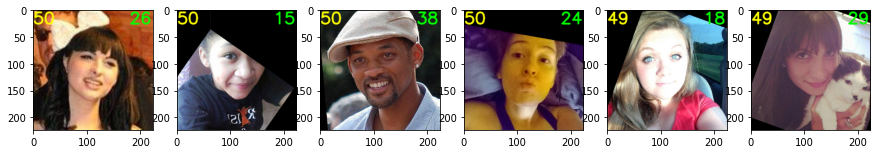

In [14]:
33
w, b = stochastic_gradient_descent(age_train, features_train, age_val, features_val)
print('w: ', w, '\n')
print('b: ', b, '\n')
loss = evaluate(w, b, age_val, features_val)
print("Your validate loss is:", round(loss, 3))

# Test and Generate results file

In [15]:
prediction = test(w, b, features_test, filename='softmax.txt')
print("Test results has saved to softmax.txt")
print(prediction[:10])

Test results has saved to softmax.txt
[50.00516323 50.06194953 50.07656738 50.05750087 50.02805272 49.97101917
 49.95904884 49.97051058 50.10758002 50.02911303]
